# import modules

In [48]:
from scripts.Classes_ver1 import *
from scripts.default_params_ver1 import *
from scripts.functions_ver1 import *

# # after making changes to scripts, reload them
# import importlib

# import scripts.Classes_ver1
# importlib.reload(scripts.Classes_ver1)
# from scripts.Classes_ver1 import *

# import scripts.default_params_ver1
# importlib.reload(scripts.default_params_ver1)
# from scripts.default_params_ver1 import *

# import scripts.functions_ver1
# importlib.reload(scripts.functions_ver1)
# from scripts.functions_ver1 import *

# define plotting functions

In [49]:
# plot contour of mismatch between RP & L as a function of omega_tilde and theta_tilde

def mismatch_contour_P(cmd, l_params, rp_params, np_params, lens_Class=LensingGeo, prec_Class=Precessing):
    n_pts = 60
    omega_tilde_arr = np.linspace(0, 3, n_pts)
    theta_tilde_arr = np.linspace(0, 8, n_pts)
    X, Y = np.meshgrid(omega_tilde_arr, theta_tilde_arr)
    Z = np.zeros_like(X)
    g_min_matrix = np.zeros_like(X)

    for r in range(n_pts):
        for c in range(n_pts):
            rp_params["omega_tilde"] = X[r, c]
            rp_params["theta_tilde"] = Y[r, c]
            
            optimized_mismatch = optimize_mismatch_gammaP(
                cmd, l_params, rp_params, np_params, lens_Class, prec_Class
            )
            Z[r, c] = optimized_mismatch["ep_min"]
            g_min_matrix[r, c] = optimized_mismatch["g_min"]

    # print mismatch at the bottom left corner
    print("mismatch at bottom left corner = {:.3g}".format(Z[0, 0]))

    # print coordinates where mismatch is min
    min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
    print("min mismatch = {:.3g}".format(Z[min_idx]))
    print("min omega_tilde = {:.3g}".format(X[min_idx]))
    print("min theta_tilde = {:.3g}".format(Y[min_idx]))
    print("min gamma_P = {:.3g}".format(g_min_matrix[min_idx]))
    
    # print coordinates where mismatch is max
    max_idx = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    print("max mismatch = {:.3g}".format(Z[max_idx]))
    print("max omega_tilde = {:.3g}".format(X[max_idx]))
    print("max theta_tilde = {:.3g}".format(Y[max_idx]))

    plt.contourf(X, Y, Z, levels=60, cmap="jet")
    plt.xlabel(r"$\tilde{\Omega}$")
    plt.ylabel(r"$\tilde{\theta}$")
    
    if cmd in ["L & RP", "RP & L"]:
        plt.colorbar(label=r"$\epsilon(\~h_{\rm P}, \~h_{\rm L})$", cmap="jet", norm=colors.Normalize(vmin=0, vmax=1))
    elif cmd in ["RP & NP", "NP & RP"]:
        plt.colorbar(label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm NP})$", cmap="jet", norm=colors.Normalize(vmin=0, vmax=1))

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
            rp_params["theta_S"],
            rp_params["phi_S"],
            rp_params["theta_J"],
            rp_params["phi_J"],
        )
    )

In [50]:
# plot contour of mismatch between RP & L as a function of omega_tilde and theta_tilde

def mismatch_contour_P_faceon(cmd, l_params, rp_params, np_params, lens_Class=LensingGeo, prec_Class=Precessing):
    n_pts = 100
    omega_tilde_arr = np.linspace(0, 3, n_pts)
    theta_tilde_arr = np.linspace(0, 1, n_pts)
    X, Y = np.meshgrid(omega_tilde_arr, theta_tilde_arr)
    Z = np.zeros_like(X)
    g_min_matrix = np.zeros_like(X)

    for r in range(n_pts):
        for c in range(n_pts):
            rp_params["omega_tilde"] = X[r, c]
            rp_params["theta_tilde"] = Y[r, c]
            
            optimized_mismatch = optimize_mismatch_gammaP(
                cmd, l_params, rp_params, np_params, lens_Class, prec_Class
            )
            Z[r, c] = optimized_mismatch["ep_min"]
            g_min_matrix[r, c] = optimized_mismatch["g_min"]

    # print mismatch at the bottom left corner
    print("mismatch at bottom left corner = {:.3g}".format(Z[0, 0]))

    # print coordinates where mismatch is min
    min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
    print("min mismatch = {:.3g}".format(Z[min_idx]))
    print("min omega_tilde = {:.3g}".format(X[min_idx]))
    print("min theta_tilde = {:.3g}".format(Y[min_idx]))
    print("min gamma_P = {:.3g}".format(g_min_matrix[min_idx]))
    
    # print coordinates where mismatch is max
    max_idx = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    print("max mismatch = {:.3g}".format(Z[max_idx]))
    print("max omega_tilde = {:.3g}".format(X[max_idx]))
    print("max theta_tilde = {:.3g}".format(Y[max_idx]))

    plt.contourf(X, Y, Z, levels=100, cmap="jet")
    plt.xlabel(r"$\tilde{\Omega}$")
    plt.ylabel(r"$\tilde{\theta}$")
    
    if cmd in ["L & RP", "RP & L"]:
        plt.colorbar(label=r"$\epsilon(\~h_{\rm P}, \~h_{\rm L})$", cmap="jet")
    elif cmd in ["RP & NP", "NP & RP"]:
        plt.colorbar(label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm NP})$", cmap="jet")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}".format(
            rp_params["theta_S"],
            rp_params["phi_S"],
            rp_params["theta_J"],
            rp_params["phi_J"],
        )
    )

In [51]:
# make a function to plot mismatch between fixed RP & L as a function of theta_J and phi_J

def mismatch_contour_J(cmd, l_params, rp_params, np_params, lens_Class=LensingGeo, prec_Class=Precessing):
    n_pts = 60
    phi_J_arr = np.linspace(0, 2*np.pi, n_pts)
    theta_J_arr = np.linspace(0, np.pi, n_pts)
    X, Y = np.meshgrid(phi_J_arr, theta_J_arr)
    Z = np.zeros_like(X)
    g_min_matrix = np.zeros_like(X)

    for r in range(n_pts):
        for c in range(n_pts):
            l_params["phi_J"] = rp_params["phi_J"] = np_params["phi_J"] = X[r, c]
            l_params["theta_J"] = rp_params["theta_J"] = np_params["theta_J"] = Y[r, c]
            
            optimized_mismatch = optimize_mismatch_gammaP(
                cmd, l_params, rp_params, np_params, lens_Class, prec_Class
            )
            Z[r, c] = optimized_mismatch["ep_min"]
            g_min_matrix[r, c] = optimized_mismatch["g_min"]


    # print coordinates where mismatch is min
    min_idx = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
    print("min mismatch = {:.3g}".format(Z[min_idx]))
    print("min phi_J = {:.3g}".format(X[min_idx]))
    print("min theta_J = {:.3g}".format(Y[min_idx]))
    print("min gamma_P = {:.3g}".format(g_min_matrix[min_idx]))

    # print coordinates where mismatch is max
    max_idx = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
    print("max mismatch = {:.3g}".format(Z[max_idx]))
    print("max phi_J = {:.3g}".format(X[max_idx]))
    print("max theta_J = {:.3g}".format(Y[max_idx]))

    plt.contourf(X, np.cos(Y), Z, levels=60, cmap="jet")
    plt.xlabel(r"$\phi_J$")
    plt.xticks(np.arange(0, 2*np.pi + np.pi/4, np.pi/4), [r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$'])
    plt.ylabel(r'$\cos \theta_J$')
    
    if cmd in ["L & RP", "RP & L"]:
        plt.colorbar(label=r"$\epsilon(\~h_{\rm P}, \~h_{\rm L})$", cmap="jet", norm=colors.Normalize(vmin=0, vmax=1))
    elif cmd in ["RP & NP", "NP & RP"]:
        plt.colorbar(label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm NP})$", cmap="jet", norm=colors.Normalize(vmin=0, vmax=1))
    
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, {} = {:.3g}, {} = {:.3g}".format(
            rp_params["theta_S"],
            rp_params["phi_S"],
            r"$\~{\theta}$",
            rp_params["theta_tilde"],
            r"$\~{\Omega}$",
            rp_params["omega_tilde"],
        )
    )

# mismatch between RP & L with L fixed

## testing

mismatch at bottom left corner = 0.24
min mismatch = 0.14
min omega_tilde = 1.26
min theta_tilde = 6.32
min gamma_P = 4.13
max mismatch = 0.306
max omega_tilde = 3
max theta_tilde = 8


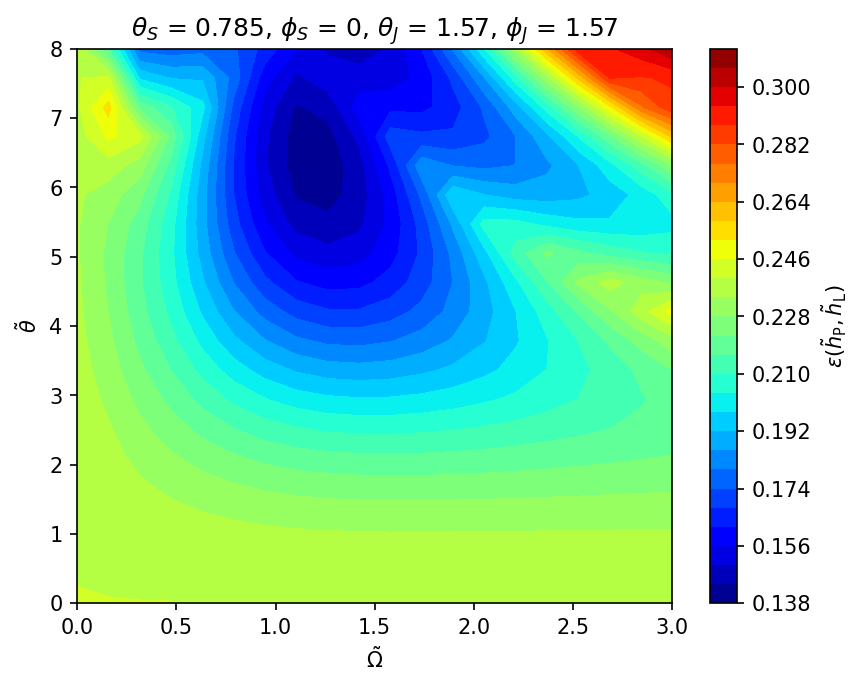

In [4]:
lens_params, RP_params, NP_params = set_to_params(lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 10
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass
RP_params["theta_tilde"] = 8
RP_params["omega_tilde"] = 0.5

mismatch_contour_P( "RP & L", lens_params, RP_params, NP_params)

## face-on

mismatch at bottom left corner = 0.275
min mismatch = 0.181
min omega_tilde = 0.305
min theta_tilde = 0
min gamma_P = 0
max mismatch = 0.452
max omega_tilde = 3
max theta_tilde = 0


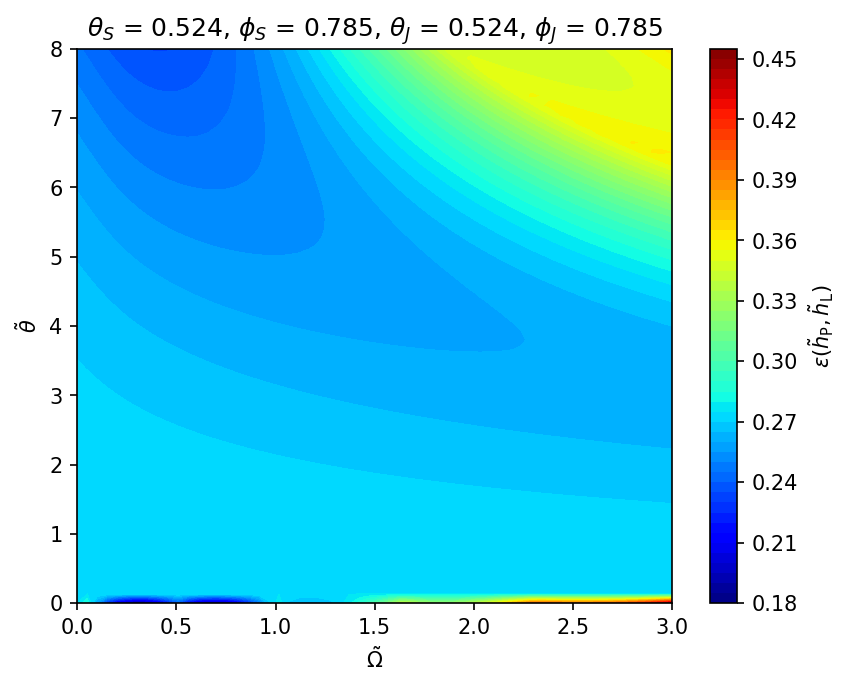

In [41]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 20
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P( "RP & L", lens_params, RP_params, NP_params)

mismatch at bottom left corner = 0.0222
min mismatch = 0.00404
min omega_tilde = 0.203
min theta_tilde = 0
min gamma_P = 0
max mismatch = 0.185
max omega_tilde = 2.85
max theta_tilde = 0


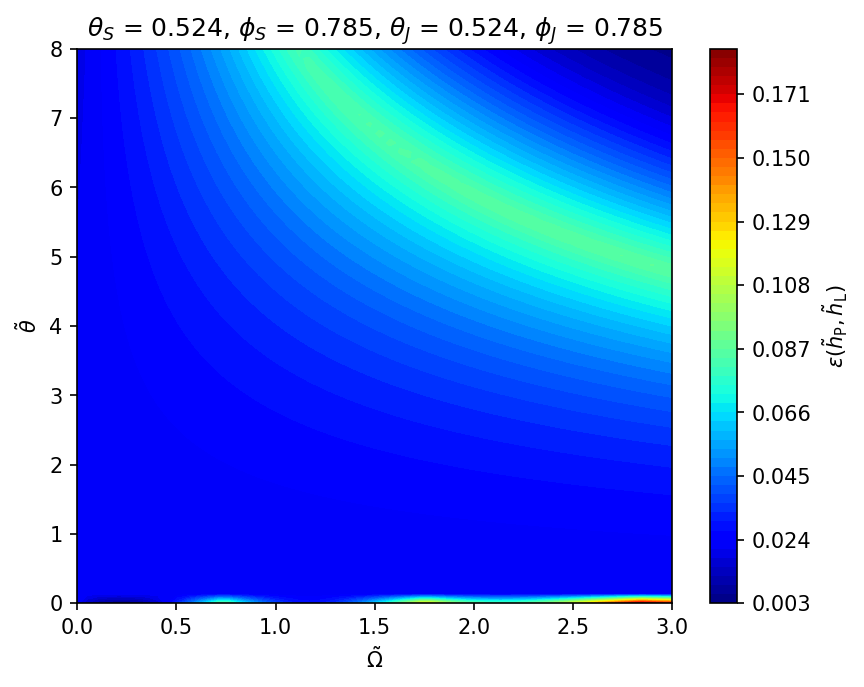

In [42]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P( "RP & L", lens_params, RP_params, NP_params)

mismatch at bottom left corner = 0.0222
min mismatch = 0.00395
min omega_tilde = 0.212
min theta_tilde = 0
min gamma_P = 0
max mismatch = 0.184
max omega_tilde = 2.85
max theta_tilde = 0


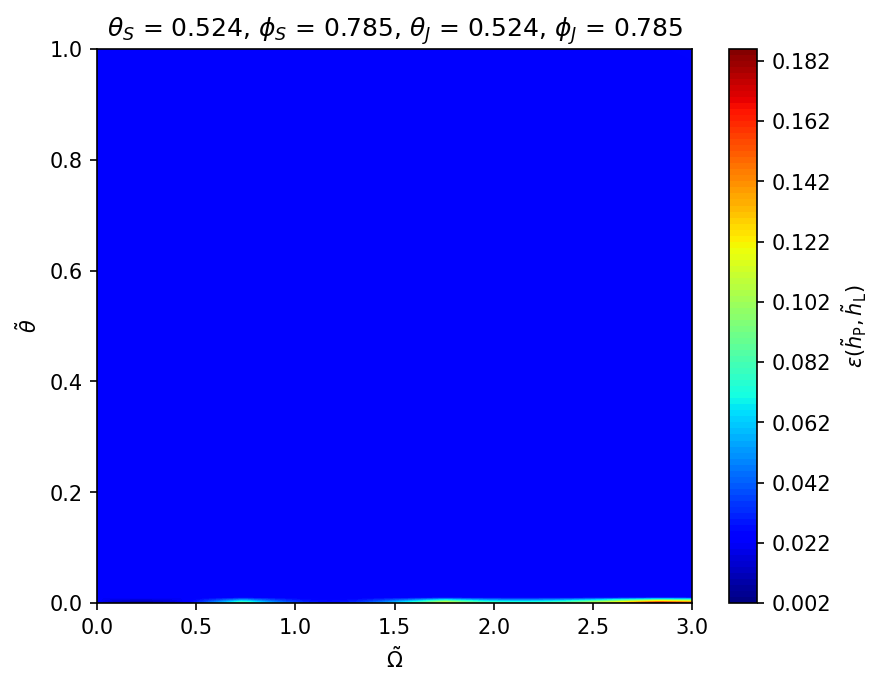

In [36]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# with n_pts = 100
mismatch_contour_P_faceon( "RP & L", lens_params, RP_params, NP_params)

## edge-on

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:386: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


mismatch at bottom left corner = 0.275
min mismatch = 0.0187
min omega_tilde = 1.32
min theta_tilde = 2.17
min gamma_P = 3.3
max mismatch = 0.339
max omega_tilde = 3
max theta_tilde = 5.02


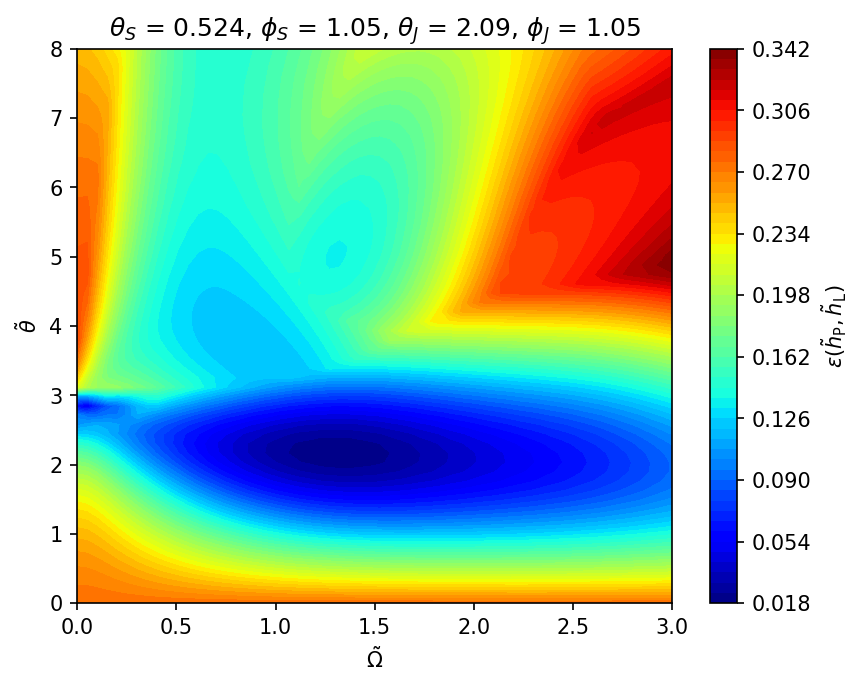

In [43]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['edgeon'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 20
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P( "RP & L", lens_params, RP_params, NP_params)

mismatch at bottom left corner = 0.0222
min mismatch = 0.000283
min omega_tilde = 1.07
min theta_tilde = 2.85
min gamma_P = 6.09
max mismatch = 0.06
max omega_tilde = 3
max theta_tilde = 4.34


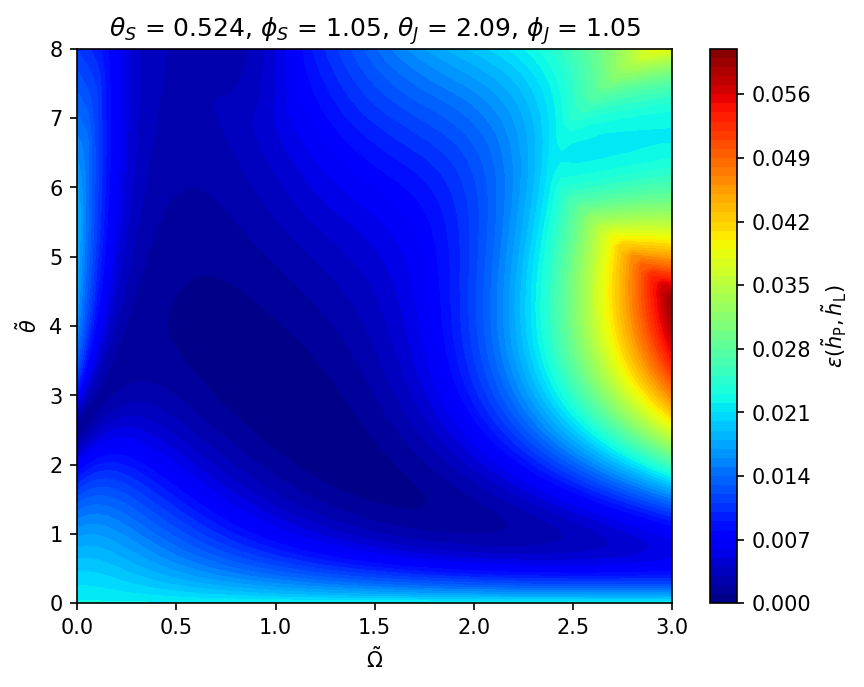

In [44]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['edgeon'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P( "RP & L", lens_params, RP_params, NP_params)

## random

mismatch at bottom left corner = 0.275
min mismatch = 0.0226
min omega_tilde = 1.32
min theta_tilde = 4.2
min gamma_P = 4.82
max mismatch = 0.275
max omega_tilde = 0
max theta_tilde = 0


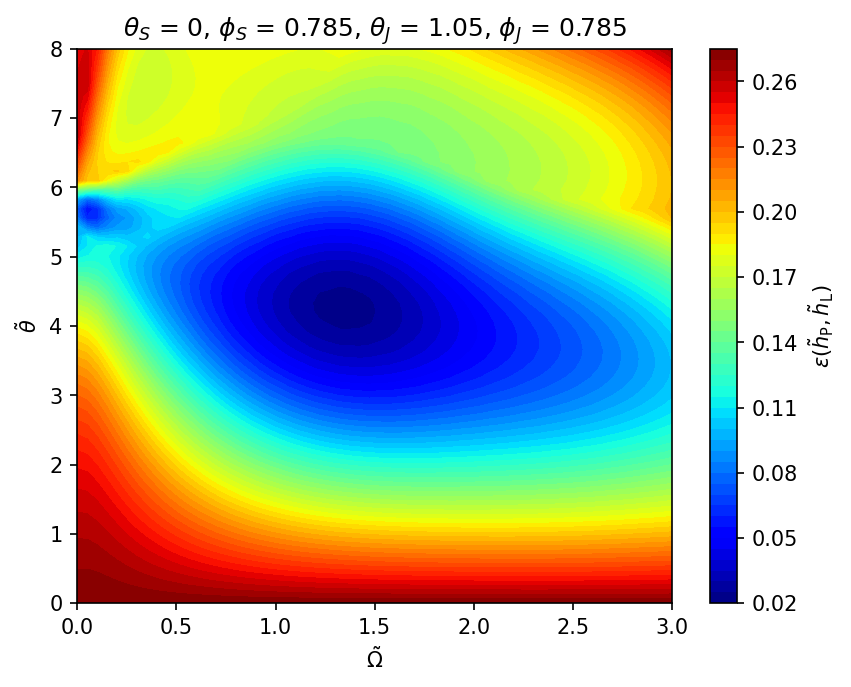

In [45]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['random'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 20
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P( "RP & L", lens_params, RP_params, NP_params)

mismatch at bottom left corner = 0.0222
min mismatch = 0.000382
min omega_tilde = 0.763
min theta_tilde = 8
min gamma_P = 1.14
max mismatch = 0.029
max omega_tilde = 3
max theta_tilde = 8


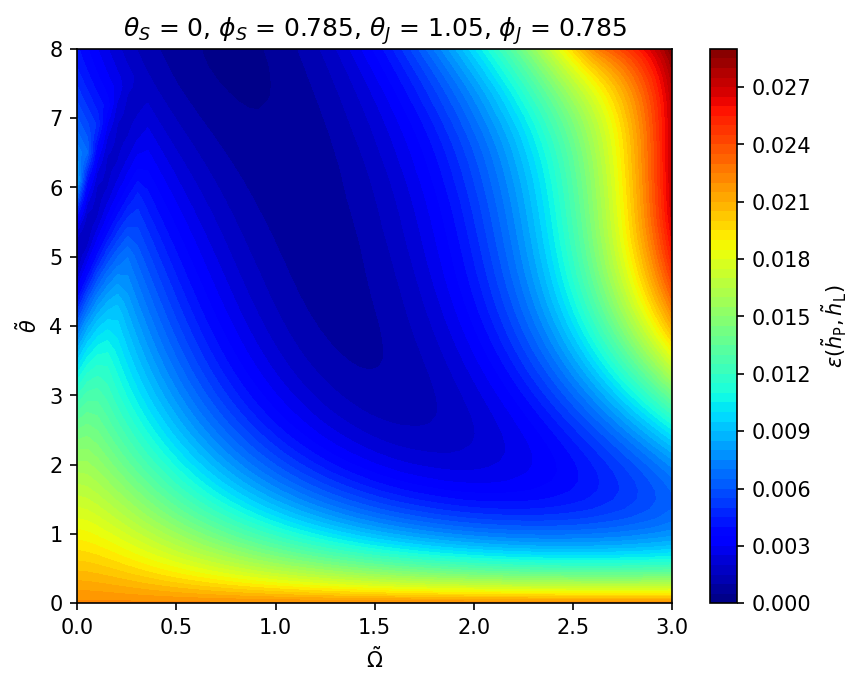

In [46]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['random'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P( "RP & L", lens_params, RP_params, NP_params)

# mismatch between RP & NP with NP fixed

## face-on

mismatch at bottom left corner = 0
min mismatch = 0
min omega_tilde = 0
min theta_tilde = 0
min gamma_P = 0
max mismatch = 0.163
max omega_tilde = 2.64
max theta_tilde = 0


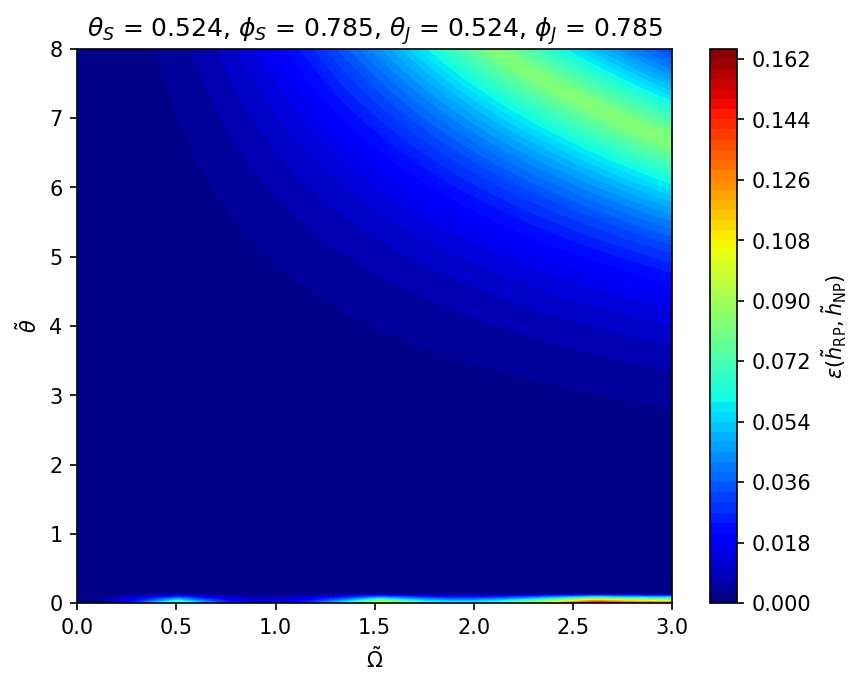

In [52]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P("RP & NP", lens_params, RP_params, NP_params)

## edge-on

mismatch at bottom left corner = 1.11e-16
min mismatch = 1.11e-16
min omega_tilde = 0
min theta_tilde = 0
min gamma_P = 0
max mismatch = 0.0774
max omega_tilde = 3
max theta_tilde = 2.85


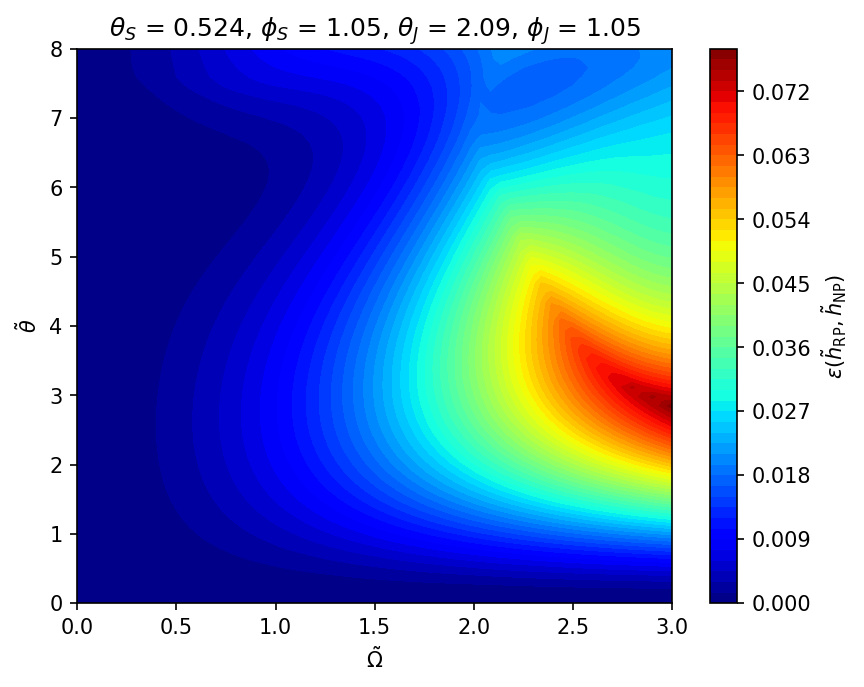

In [53]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['edgeon'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P("RP & NP", lens_params, RP_params, NP_params)

## random

mismatch at bottom left corner = -2.22e-16
min mismatch = -2.22e-16
min omega_tilde = 0
min theta_tilde = 0
min gamma_P = 0
max mismatch = 0.0547
max omega_tilde = 3
max theta_tilde = 5.69


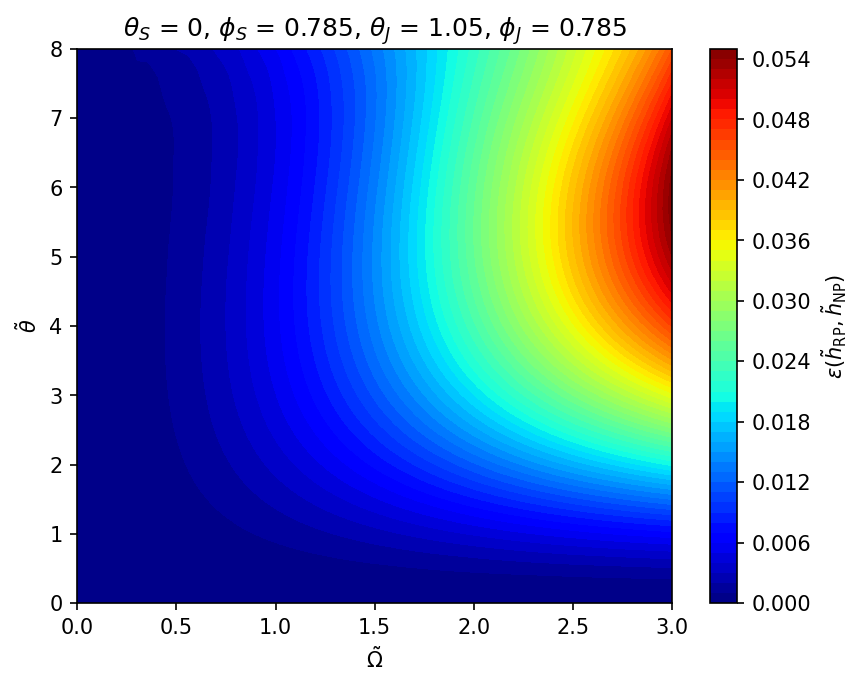

In [54]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['random'], lens_params_0, RP_params_0, NP_params_0)

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_P("RP & NP", lens_params, RP_params, NP_params)

# mismatch between fixed RP & L as a function of $\theta_J$ & $\phi_J$

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:389: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


min mismatch = 0.0222
min phi_J = 2.98
min theta_J = 0.213
min gamma_P = 0
max mismatch = 0.0222
max phi_J = 1.17
max theta_J = 0.16
order of arguments: phi_S, theta_S, phi_J, theta_J


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/functions_ver1.py:293: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(X, np.cos(Y), Z, levels=[0], linestyles='-', colors='black', labels='edge-on')


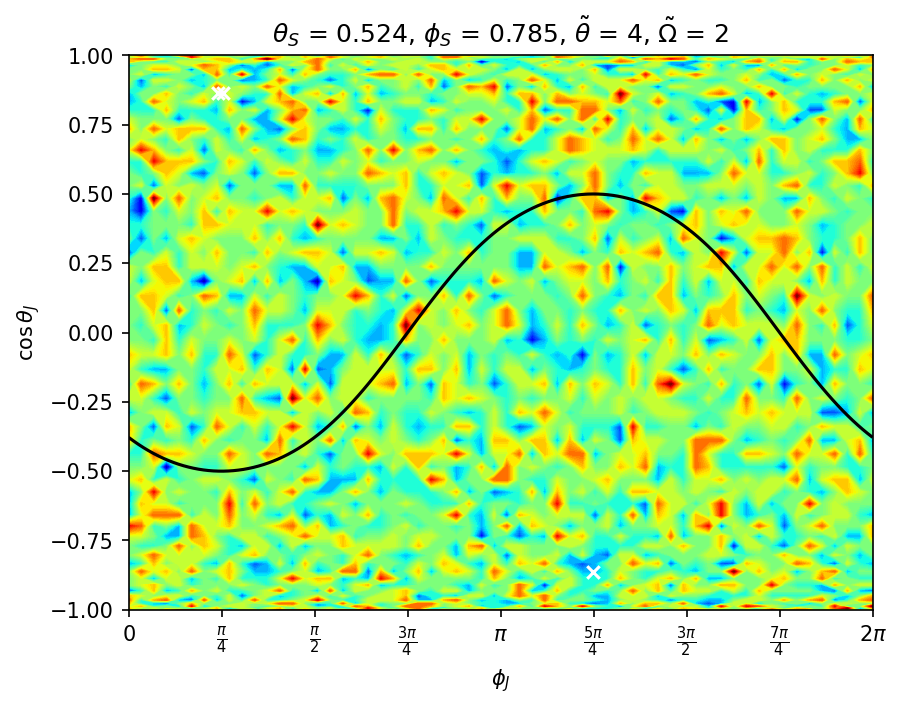

In [55]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)
phi_S, theta_S = lens_params['phi_S'], lens_params['theta_S']

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

mismatch_contour_J("L & NP", lens_params, RP_params, NP_params)
plot_special_coords("S", phi_S, theta_S)

min mismatch = 0.000713
min phi_J = 4.05
min theta_J = 1.01
min gamma_P = 0.0635
max mismatch = 0.0208
max phi_J = 4.79
max theta_J = 1.22
order of arguments: phi_S, theta_S, phi_J, theta_J


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/functions_ver1.py:293: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(X, np.cos(Y), Z, levels=[0], linestyles='-', colors='black', labels='edge-on')


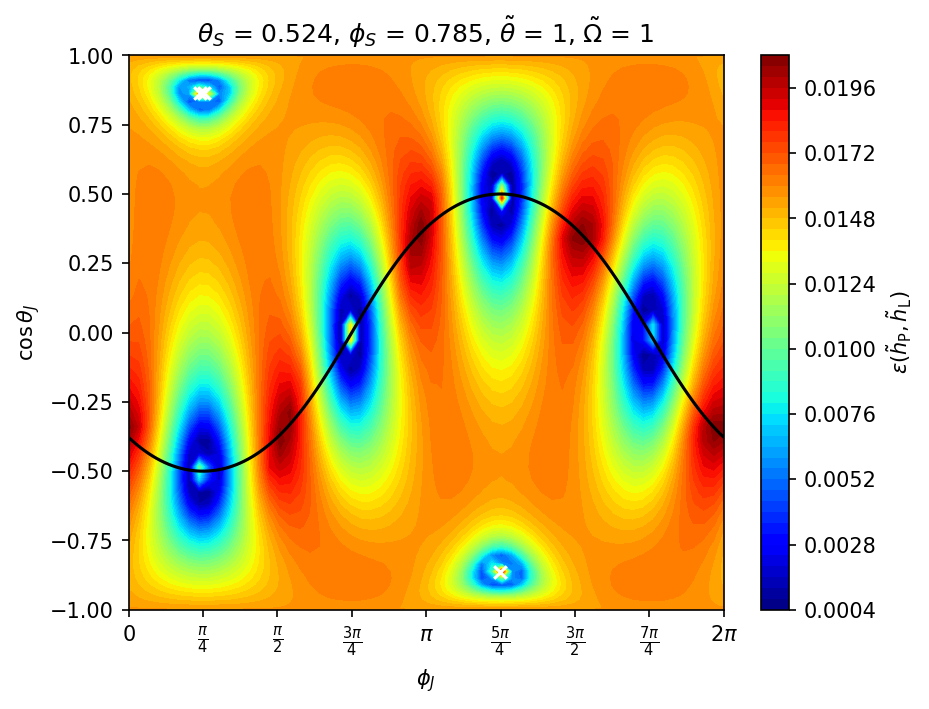

In [56]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)
phi_S, theta_S = lens_params['phi_S'], lens_params['theta_S']

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# set RP to 1% in theta_omega_pairs
RP_params['omega_tilde'] = omega_theta_tilde_pairs['05%']['omega_tilde']
RP_params['theta_tilde'] = omega_theta_tilde_pairs['05%']['theta_tilde']

mismatch_contour_J("RP & L", lens_params, RP_params, NP_params)
plot_special_coords("S", phi_S, theta_S)

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:389: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


min mismatch = 1.62e-06
min phi_J = 6.28
min theta_J = 1.92
min gamma_P = 2.6
max mismatch = 0.0537
max phi_J = 3.94
max theta_J = 1.06
order of arguments: phi_S, theta_S, phi_J, theta_J


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/functions_ver1.py:293: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(X, np.cos(Y), Z, levels=[0], linestyles='-', colors='black', labels='edge-on')


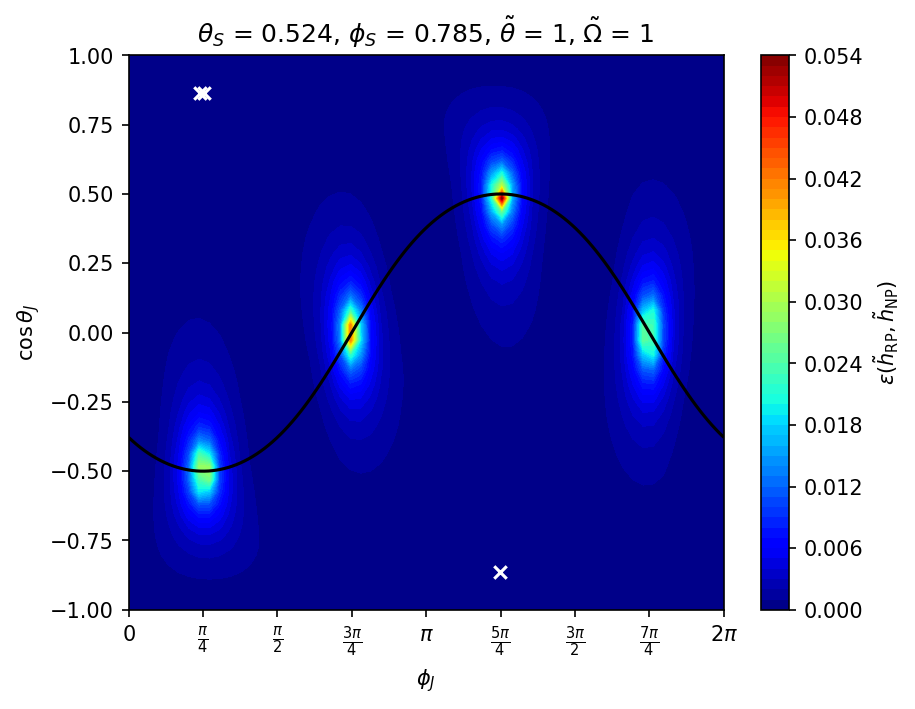

In [57]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)
phi_S, theta_S = lens_params['phi_S'], lens_params['theta_S']

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# set RP to 1% in theta_omega_pairs
RP_params['omega_tilde'] = omega_theta_tilde_pairs['05%']['omega_tilde']
RP_params['theta_tilde'] = omega_theta_tilde_pairs['05%']['theta_tilde']

mismatch_contour_J("RP & NP", lens_params, RP_params, NP_params)
plot_special_coords("S", phi_S, theta_S)

/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


min mismatch = 0.00078
min phi_J = 4.37
min theta_J = 1.17
min gamma_P = 4.51
max mismatch = 0.0554
max phi_J = 2.34
max theta_J = 1.6
order of arguments: phi_S, theta_S, phi_J, theta_J


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/functions_ver1.py:293: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(X, np.cos(Y), Z, levels=[0], linestyles='-', colors='black', labels='edge-on')


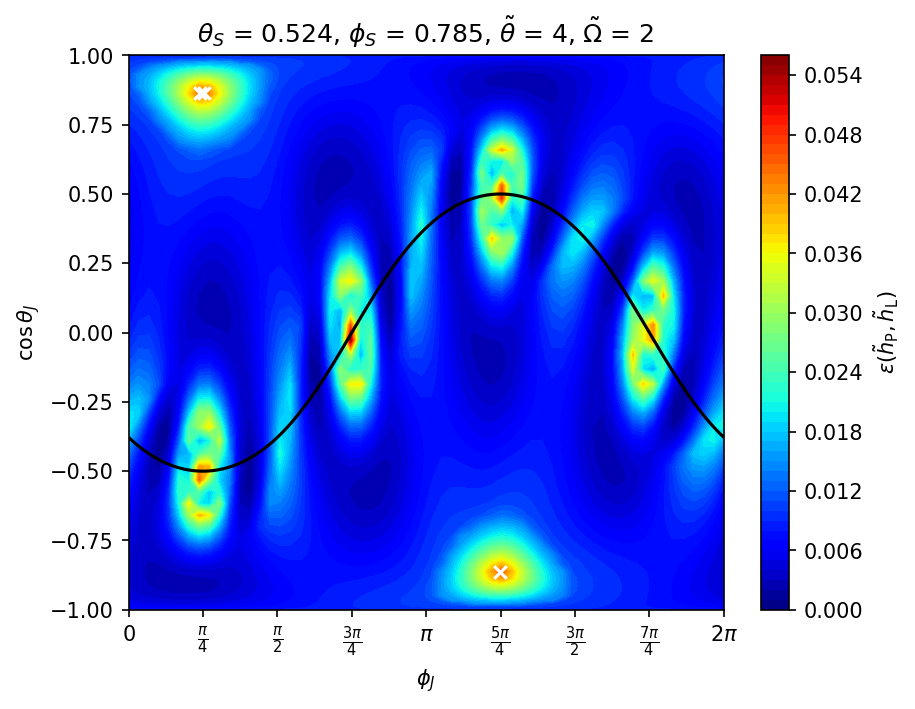

In [58]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)
phi_S, theta_S = lens_params['phi_S'], lens_params['theta_S']

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# set RP to 1% in theta_omega_pairs
RP_params['omega_tilde'] = omega_theta_tilde_pairs['50%']['omega_tilde']
RP_params['theta_tilde'] = omega_theta_tilde_pairs['50%']['theta_tilde']

mismatch_contour_J("RP & L", lens_params, RP_params, NP_params)
plot_special_coords("S", phi_S, theta_S)

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:389: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


min mismatch = 0.00134
min phi_J = 3.83
min theta_J = 2.45
min gamma_P = 3.05
max mismatch = 0.0773
max phi_J = 0.745
max theta_J = 1.86
order of arguments: phi_S, theta_S, phi_J, theta_J


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/functions_ver1.py:293: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(X, np.cos(Y), Z, levels=[0], linestyles='-', colors='black', labels='edge-on')


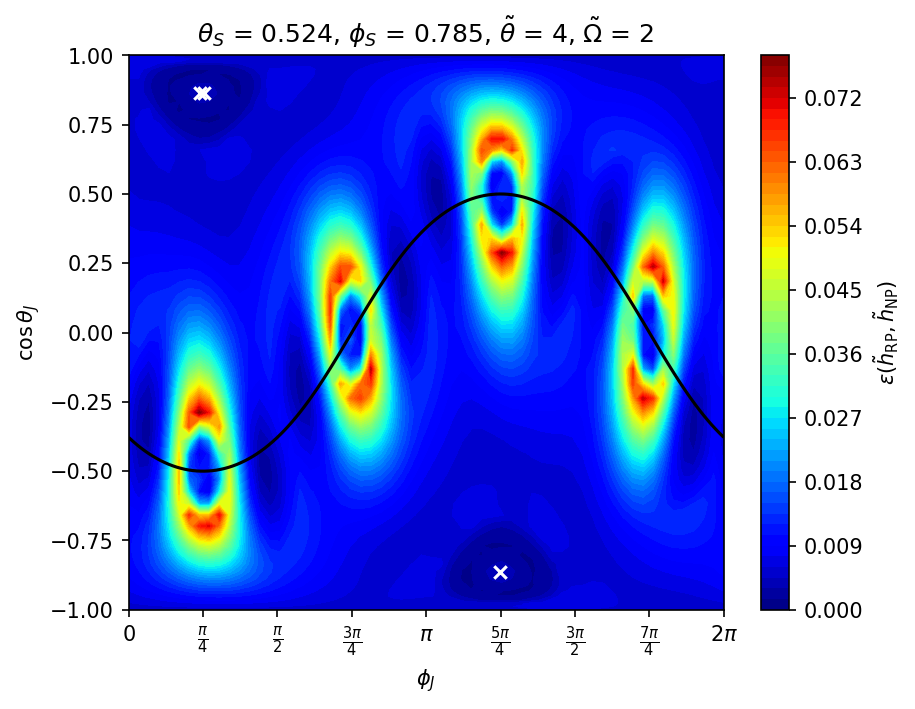

In [59]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)
phi_S, theta_S = lens_params['phi_S'], lens_params['theta_S']

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# set RP to 1% in theta_omega_pairs
RP_params['omega_tilde'] = omega_theta_tilde_pairs['50%']['omega_tilde']
RP_params['theta_tilde'] = omega_theta_tilde_pairs['50%']['theta_tilde']

mismatch_contour_J("RP & NP", lens_params, RP_params, NP_params)
plot_special_coords("S", phi_S, theta_S)

/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


min mismatch = 0.0026
min phi_J = 0.852
min theta_J = 0.426
min gamma_P = 6.16
max mismatch = 0.189
max phi_J = 4.79
max theta_J = 1.17
order of arguments: phi_S, theta_S, phi_J, theta_J


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/functions_ver1.py:293: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(X, np.cos(Y), Z, levels=[0], linestyles='-', colors='black', labels='edge-on')


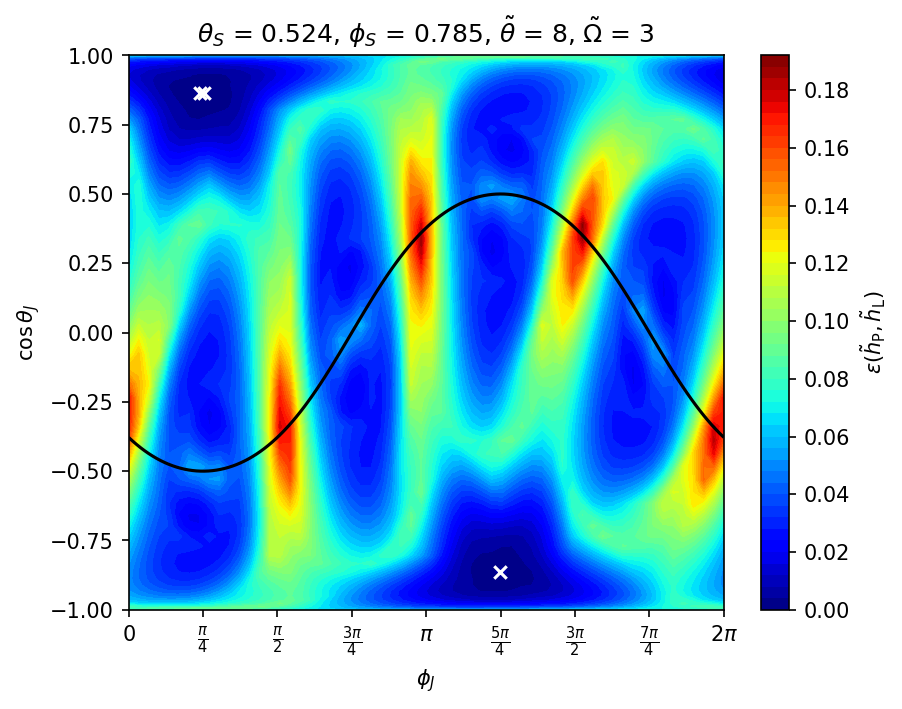

In [60]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)
phi_S, theta_S = lens_params['phi_S'], lens_params['theta_S']

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# set RP to 1% in theta_omega_pairs
RP_params['omega_tilde'] = omega_theta_tilde_pairs['95%']['omega_tilde']
RP_params['theta_tilde'] = omega_theta_tilde_pairs['95%']['theta_tilde']

mismatch_contour_J("RP & L", lens_params, RP_params, NP_params)
plot_special_coords("S", phi_S, theta_S)

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:389: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi
/opt/homebrew/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


min mismatch = 0.00662
min phi_J = 5.43
min theta_J = 1.7
min gamma_P = 3.3
max mismatch = 0.163
max phi_J = 6.18
max theta_J = 1.97
order of arguments: phi_S, theta_S, phi_J, theta_J


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/functions_ver1.py:293: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contour(X, np.cos(Y), Z, levels=[0], linestyles='-', colors='black', labels='edge-on')


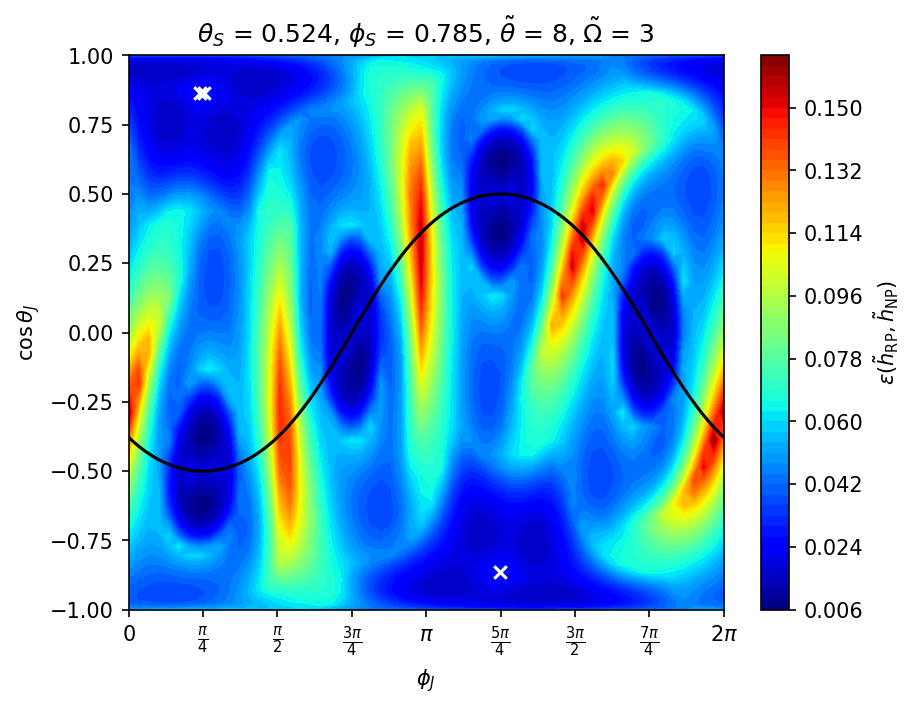

In [61]:
lens_params, RP_params, NP_params = set_to_location(loc_params['sys1']['faceon'], lens_params_0, RP_params_0, NP_params_0)
phi_S, theta_S = lens_params['phi_S'], lens_params['theta_S']

# set mcz for lensed, RP, NP
mcz = 40
lens_params['mcz'] = RP_params['mcz'] = NP_params['mcz'] = mcz * solar_mass

# set RP to 1% in theta_omega_pairs
RP_params['omega_tilde'] = omega_theta_tilde_pairs['95%']['omega_tilde']
RP_params['theta_tilde'] = omega_theta_tilde_pairs['95%']['theta_tilde']

mismatch_contour_J("RP & NP", lens_params, RP_params, NP_params)
plot_special_coords("S", phi_S, theta_S)

In [169]:
fixed_phi_arr = widgets.FloatSlider(min=0, max=2*np.pi, step=np.pi/4, value=0, description='fixed phi')
fixed_theta_arr = widgets.FloatSlider(min=0, max=np.pi, step=np.pi/12, value=np.pi/4, description='fixed theta')

def slider_inclination_contour_w_special_coords(fix, fixed_phi, fixed_theta):
    cos_i_JN_contour(fix, fixed_phi, fixed_theta)
    plot_special_coords(fix, fixed_phi, fixed_theta)

interact(slider_inclination_contour_w_special_coords, fix=fixed("S"), fixed_phi=fixed_phi_arr, fixed_theta=fixed_theta_arr)

interactive(children=(FloatSlider(value=0.0, description='fixed phi', max=6.283185307179586, step=0.7853981633…

<function __main__.slider_inclination_contour_w_special_coords(fix, fixed_phi, fixed_theta)>